# Exploring Advertisements in our Dataset

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Load and Process Data

In [237]:
os.listdir('merged datasets')

['.DS_Store',
 'merged_50405.csv',
 'merged_12345.csv',
 'merged_10824.csv',
 'Merging Datasets.ipynb',
 '.ipynb_checkpoints',
 'merged_33534.csv',
 'merged_26301.csv']

### Load Data

In [705]:
# Load data from merged datasets folder
df10824 = pd.read_csv('merged datasets/merged_10824.csv',index_col=0)
df12345 = pd.read_csv('merged datasets/merged_12345.csv',index_col=0)
df26301 = pd.read_csv('merged datasets/merged_26301.csv',index_col=0)
df33534 = pd.read_csv('merged datasets/merged_33534.csv',index_col=0)
df50405 = pd.read_csv('merged datasets/merged_50405.csv',index_col=0)

# Remove extra "Unnamed: 0" column from df10824
df10824.drop(['Unnamed: 0'],axis=1,inplace=True)

### Process Data

In [706]:
# Create codes and dfs lists for easier processing
codes = ['10824','12345','26301','33534','50405']
dfs = [df10824, df12345, df26301, df33534,df50405]

In [707]:
# Check original shape of dfs
print("Shapes of Original Dataframes")
for df, code in zip(dfs,codes):
    print(code,df.shape)
    
# Check for duplicate rows (duplicate 'Date' and 'Link')
print("\nNumber of Duplicate Rows")
for df, code in zip(dfs,codes):
    duplicates = df[df.duplicated(subset=['Date','Link'])]
    print(code, len(duplicates))
    
# Remove duplicate rows (duplicate 'Date' and 'Link')
print("\nUpdated Shapes and Number of Duplicates")
for df, code in zip(dfs,codes):
    df.drop_duplicates(subset=['Date','Link'],inplace=True,keep='first',ignore_index=True)
    duplicates = df[df.duplicated()]
    print(code, df.shape, len(duplicates), "duplicates")

Shapes of Original Dataframes
10824 (11153, 22)
12345 (25663, 22)
26301 (10730, 22)
33534 (9170, 22)
50405 (27723, 22)

Number of Duplicate Rows
10824 608
12345 6587
26301 2024
33534 1146
50405 3432

Updated Shapes and Number of Duplicates
10824 (10545, 22) 0 duplicates
12345 (19076, 22) 0 duplicates
26301 (8706, 22) 0 duplicates
33534 (8024, 22) 0 duplicates
50405 (24291, 22) 0 duplicates


In [708]:
for df, code in zip(dfs,codes):
    # Convert 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Create additional columns for month and year
    df['Year'] = df['Date'].dt.year #df['Date'].apply(lambda date:date.year)
    df['Month'] = df['Date'].dt.month #df['Date'].apply(lambda date:date.month)
    
    # Create additional column for user's code
    df['code'] = code

In [709]:
# Create df with all data
all_dfs = pd.concat(dfs)

In [710]:
all_dfs.shape

(70642, 25)

## Explore All Data

In [711]:
# Check all columns
all_dfs.columns

Index(['Date', 'Link', 'video_id', 'video_timestamp', 'video_duration',
       'video_locationcreated', 'suggested_words', 'video_diggcount',
       'video_sharecount', 'video_commentcount', 'video_playcount',
       'video_description', 'video_is_ad', 'video_stickers', 'author_username',
       'author_name', 'author_followercount', 'author_followingcount',
       'author_heartcount', 'author_videocount', 'author_diggcount',
       'author_verified', 'Year', 'Month', 'code'],
      dtype='object')

In [712]:
# Check datatypes
all_dfs.dtypes

Date                     datetime64[ns]
Link                             object
video_id                          int64
video_timestamp                  object
video_duration                  float64
video_locationcreated            object
suggested_words                  object
video_diggcount                 float64
video_sharecount                float64
video_commentcount              float64
video_playcount                 float64
video_description                object
video_is_ad                        bool
video_stickers                  float64
author_username                  object
author_name                      object
author_followercount            float64
author_followingcount           float64
author_heartcount               float64
author_videocount               float64
author_diggcount                float64
author_verified                    bool
Year                              int32
Month                             int32
code                             object


In [713]:
# Check 'Date' range (where 'Date' is the video watch date from JSON files)
all_dfs.groupby('code')[['Year','Month']].value_counts().sort_index()

code   Year  Month
10824  2023  11         40
             12       1520
       2024  2        8985
12345  2023  9        2589
             11       1824
             12       5142
       2024  1        4896
             2        3859
             3         766
26301  2023  9           1
             10         10
             11          9
             12         30
       2024  1          75
             2        3700
             3        4881
33534  2023  9          25
             10         23
             11         36
             12         60
       2024  1        4389
             2        3491
50405  2023  8        9074
             9         948
             10       1442
             11        955
             12       5735
       2024  1        6010
             2         127
Name: count, dtype: int64

/Users/edithpo/miniconda3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/edithpo/miniconda3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/edithpo/miniconda3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/edithpo/miniconda3/lib/python3

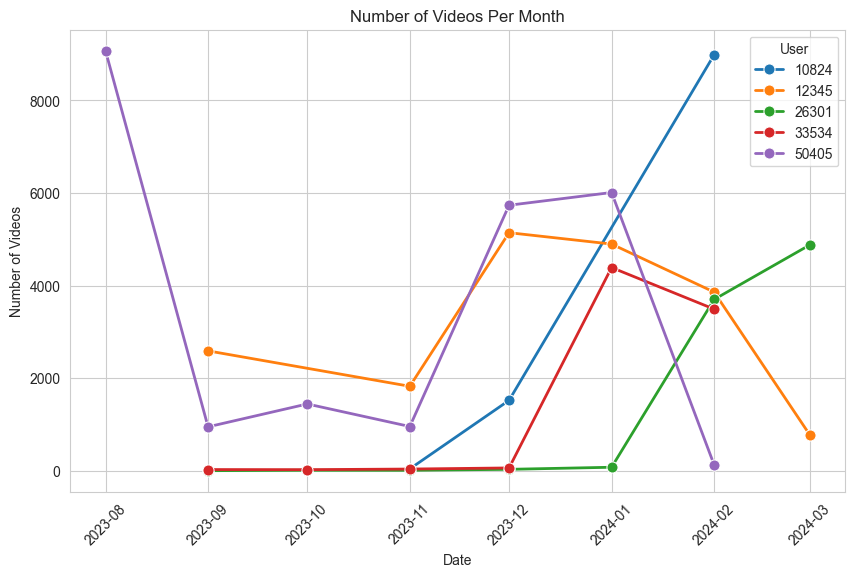

In [728]:
# Visualize the number of videos over time for each user
vid_counts = all_dfs.groupby('code')[['Year','Month']].value_counts().sort_index().reset_index()

# Create a new 'Date'column, assigning each year-month a specific day value of 1
vid_counts['Date'] = pd.to_datetime(vid_counts[['Year','Month']].assign(day=1))

# Rename some columns
vid_counts.columns = ['User','Year','Month','Video Count','Date']

# Create a line graph
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.lineplot(data=vid_counts, x='Date',y='Video Count',
             hue='User',marker='o',linewidth=2, markersize=8)
plt.xlabel('Date')
plt.ylabel('Number of Videos')
plt.title('Number of Videos Per Month')

# Relabel x-ticks
plt.xticks(rotation=45)
plt.show()


# Version that uses YYYY-MM-DD
# # Visualize the number of ads over time for each user
# vid_counts = all_dfs.copy()
# vid_counts['Date'] = vid_counts['Date'].dt.date # only include MM-YY-DD

# # Get count of videos per day for each user
# vid_counts = vid_counts.groupby('code')['Date'].value_counts().reset_index() # turn into df
# vid_counts = vid_counts.set_index('Date').sort_index() # make Date the index, sort it

# # # Create a line graph
# plt.figure(figsize=(20, 10))
# sns.set_style("whitegrid")
# sns.lineplot(data=vid_counts, x='Date',y='count',
#              hue='code',marker='o',linewidth=3, markersize=8)
# plt.xlabel('Date')
# plt.ylabel('Number of Videos')
# plt.title('Number of Videos Over Time by User')

# # Relabel x-ticks
# plt.xticks(rotation=45)
# plt.show()

In [720]:
vid_counts.head()

,User,Year,Month,Video Count,Date
0,10824,2023,11,40,2023-11-01
1,10824,2023,12,1520,2023-12-01
2,10824,2024,2,8985,2024-02-01
3,12345,2023,9,2589,2023-09-01
4,12345,2023,11,1824,2023-11-01


**We see that across all our users, our videos span from as early as 08/2023 for user 50405 up to 03/2024 for user 26301.**

## Explore Advertisements Specifically

In [254]:
# Get a df of only the advertisements
all_ads = all_dfs[all_dfs['video_is_ad']==True]

In [255]:
all_ads.shape

(8797, 25)

### Number of Advertisements Over Time

In [256]:
# Check 'Date' range of advertisements
all_ads.groupby('code')[['Year','Month']].value_counts().sort_index()

code   Year  Month
10824  2023  11         13
             12        237
       2024  2          35
12345  2023  9          22
             11        200
             12        647
       2024  1         437
             2         358
             3         111
26301  2023  9           1
             10          9
             11          6
             12         19
       2024  1          32
             2         905
             3         635
33534  2023  9          24
             10         23
             11         31
             12         56
       2024  1         814
             2         635
50405  2023  8        1404
             9         180
             10        191
             11         74
             12        924
       2024  1         773
             2           1
Name: count, dtype: int64

/Users/edithpo/miniconda3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/edithpo/miniconda3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/edithpo/miniconda3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/edithpo/miniconda3/lib/python3

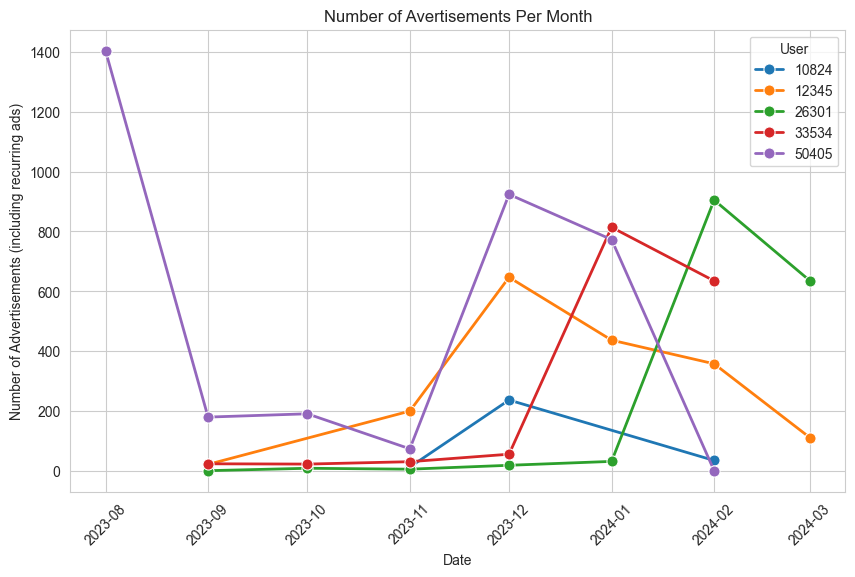

In [729]:
# Visualize the NUMBER of ads over time for each user
# Using all_ads instead of all_dfs
ad_counts = all_ads.groupby('code')[['Year','Month']].value_counts().sort_index().reset_index()

# Create a new 'Date'column, assigning each year-month a specific day value of 1
ad_counts['Date'] = pd.to_datetime(ad_counts[['Year','Month']].assign(day=1))

# Rename some columns
ad_counts.columns = ['User','Year','Month','Ad Count','Date']

# Create a line graph
plt.figure(figsize=(10, 6))
plt.style.use('default')
sns.set_style("whitegrid")
sns.lineplot(data=ad_counts, x='Date',y='Ad Count',
             hue='User',marker='o',linewidth=2, markersize=8)
plt.xlabel('Date')
plt.ylabel('Number of Advertisements (including recurring ads)')
plt.title('Number of Avertisements Per Month')
plt.xticks(rotation=45)
plt.show()

### Proportion of Advertisements Over Time

/Users/edithpo/miniconda3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/edithpo/miniconda3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/edithpo/miniconda3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/edithpo/miniconda3/lib/python3

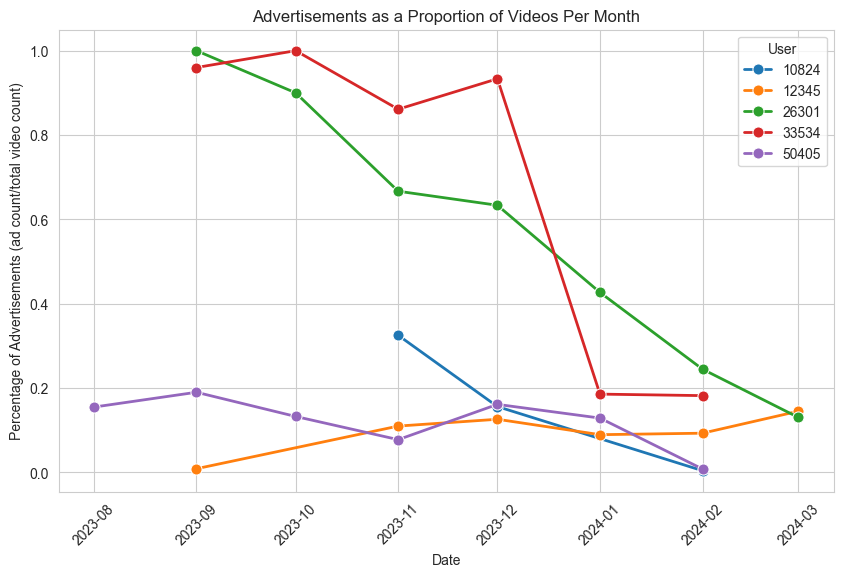

In [734]:
# Visualize the PERCENTAGE of ads per month for each user

# Combine regular video counts by date and ad video counts by date
merged_counts = pd.merge(vid_counts, ad_counts, on=['User','Year','Month','Date'])
merged_counts['Ad Proportion'] = merged_counts['Ad Count']/merged_counts['Video Count']

# Create a line graph
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.lineplot(data=merged_counts, x='Date',y='Ad Proportion',
             hue='User',marker='o',linewidth=2, markersize=8)
plt.xlabel('Date')
plt.ylabel('Percentage of Advertisements (ad count/total video count)')
plt.title('Advertisements as a Proportion of Videos Per Month')
plt.xticks(rotation=45)
plt.show()

In [865]:
merged_counts.head(3)

,User,Year,Month,Video Count,Date,Ad Count,Ad Proportion
0,10824,2023,11,40,2023-11-01,13,0.325000
1,10824,2023,12,1520,2023-12-01,237,0.155921
2,10824,2024,2,8985,2024-02-01,35,0.003895


### Date, Video Count, Ad Count, and Ad Proportion for each user

In [891]:
merged_counts_subset = merged_counts[['User','Date','Video Count','Ad Count','Ad Proportion']].copy()

In [874]:
merged_counts_subset[merged_counts_subset['User']=='10824']

,User,Date,Video Count,Ad Count,Ad Proportion
0,10824,2023-11-01,40,13,0.325000
1,10824,2023-12-01,1520,237,0.155921
2,10824,2024-02-01,8985,35,0.003895


In [872]:
merged_counts_subset[merged_counts_subset['User']=='12345']

,User,Date,Video Count,Ad Count,Ad Proportion
3,12345,2023-09-01,2589,22,0.008497
4,12345,2023-11-01,1824,200,0.109649
5,12345,2023-12-01,5142,647,0.125827
6,12345,2024-01-01,4896,437,0.089257
7,12345,2024-02-01,3859,358,0.092770
8,12345,2024-03-01,766,111,0.144909


In [870]:
merged_counts_subset[merged_counts_subset['User']=='26301']

,User,Date,Video Count,Ad Count,Ad Proportion
9,26301,2023-09-01,1,1,1.000000
10,26301,2023-10-01,10,9,0.900000
11,26301,2023-11-01,9,6,0.666667
12,26301,2023-12-01,30,19,0.633333
13,26301,2024-01-01,75,32,0.426667
14,26301,2024-02-01,3700,905,0.244595
15,26301,2024-03-01,4881,635,0.130096


In [871]:
merged_counts_subset[merged_counts_subset['User']=='33534']

,User,Date,Video Count,Ad Count,Ad Proportion
16,33534,2023-09-01,25,24,0.960000
17,33534,2023-10-01,23,23,1.000000
18,33534,2023-11-01,36,31,0.861111
19,33534,2023-12-01,60,56,0.933333
20,33534,2024-01-01,4389,814,0.185464
21,33534,2024-02-01,3491,635,0.181896


In [873]:
merged_counts_subset[merged_counts_subset['User']=='50405']

,User,Date,Video Count,Ad Count,Ad Proportion
22,50405,2023-08-01,9074,1404,0.154728
23,50405,2023-09-01,948,180,0.189873
24,50405,2023-10-01,1442,191,0.132455
25,50405,2023-11-01,955,74,0.077487
26,50405,2023-12-01,5735,924,0.161116
27,50405,2024-01-01,6010,773,0.128619
28,50405,2024-02-01,127,1,0.007874


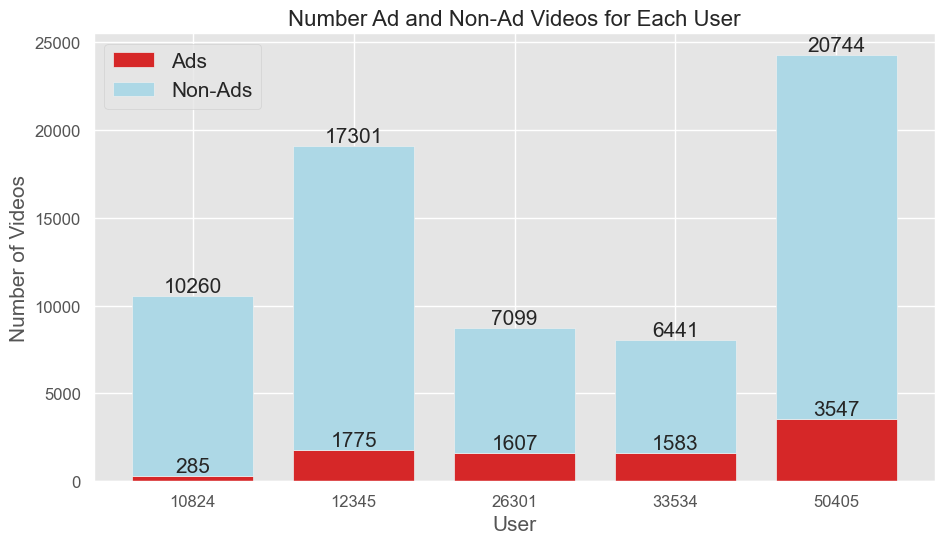

In [1104]:
# Get the counts of ads and non-ads for each user
video_counts = all_dfs.groupby(['code', 'video_is_ad']).size().unstack(fill_value=0)

# Create barplot
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 25})

# Create the bars
bar_width = 0.75
index = range(len(video_counts.index))
ad_bars = plt.bar(index, video_counts[True], bar_width, label='Ads', color='tab:red')
non_ad_bars = plt.bar(index, video_counts[False], bar_width, label='Non-Ads', 
                      bottom=video_counts[True],color='lightblue')

# Add labels, title, and legend
plt.xlabel('User', fontsize=15)
plt.ylabel('Number of Videos', fontsize=15)
plt.title('Number Ad and Non-Ad Videos for Each User', fontsize=16)
plt.xticks(index, video_counts.index, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=15)

# Add counts to the bars
for bar, ad_count, non_ad_count in zip(ad_bars, video_counts[True], video_counts[False]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{ad_count}', ha='center', va='bottom', fontsize=15)
    plt.text(bar.get_x() + bar.get_width()/2., height + non_ad_count, f'{non_ad_count}', ha='center', va='bottom', fontsize=15)

# Show plot
plt.tight_layout()
plt.show()

### Unique Advertisers

In [304]:
# Number of verified advertisers (not unique)
print("Number of verified advertisers:",
      len(all_ads[all_ads['author_verified']==True].author_name.unique()))
      
# Number of non-verified advertisers
print("Number of non-verified advertisers:",
      len(all_ads[all_ads['author_verified']==False].author_name.unique()))

Number of verified advertisers: 682
Number of non-verified advertisers: 2228


In [875]:
# Total number of advertisements
print("Total number of advertisements (including videos that reappear):",len(all_ads))

# Percentage of all videos
print("Proportion of all videos that are ads (including videos that reappear):",
      round(len(all_ads)/len(all_dfs),3))

# Number of unique advertisers
print("Number of unique advertisers:",len(all_ads['author_username'].unique()))

# Number of unique ad videos
print("Number of unique ad videos (video id):",len(all_ads['video_id'].unique()))

Total number of advertisements (including videos that reappear): 8797
Proportion of all videos that are ads (including videos that reappear): 0.125
Number of unique advertisers: 2866
Number of unique ad videos (video id): 5635


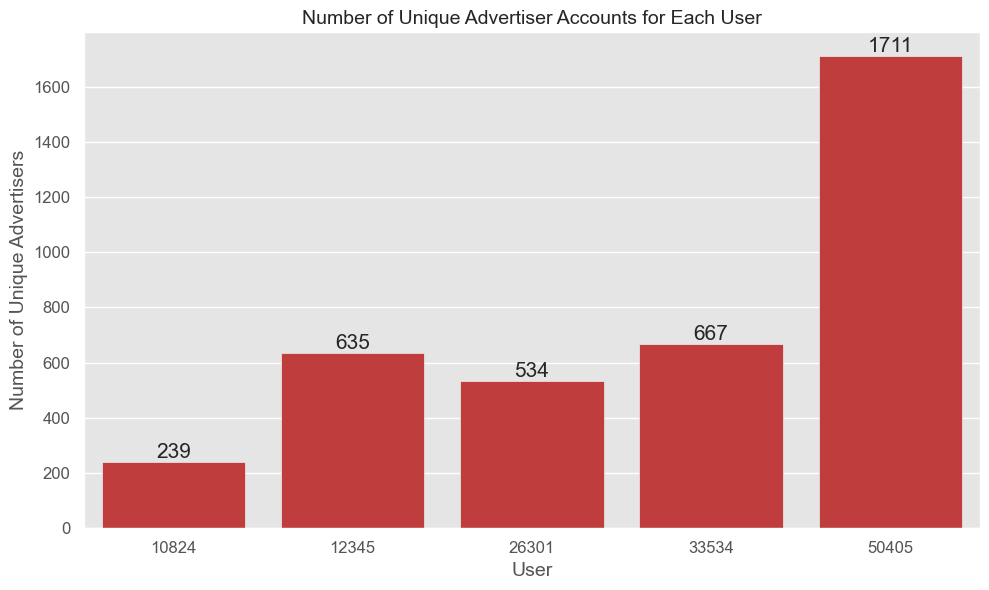

In [1108]:
# Visualize the number of unique advertisers for each user
# .nunique() counts the number of distinct elements in specified axis
advertiser_counts = all_ads.groupby('code')['author_username'].nunique()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.style.use('ggplot')
plot = sns.barplot(x=advertiser_counts.index, y=advertiser_counts.values, color='tab:red')
plt.xlabel('User',fontsize=14)
plt.ylabel('Number of Unique Advertisers',fontsize=14)
plt.title('Number of Unique Advertiser Accounts for Each User', fontsize=14)
plt.xticks(fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.tight_layout()

# Add count on top of each bar
for index, value in (enumerate(advertiser_counts.values)):
    plot.text(index,value + 0.2, str(value),ha='center',va='bottom',fontsize=15)

# Show plot
plt.show()

In [973]:
advertiser_counts

code
10824     239
12345     635
26301     534
33534     667
50405    1711
Name: author_username, dtype: int64

/Users/edithpo/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0, 0.5, 'Number of Videos Per Advertiser')

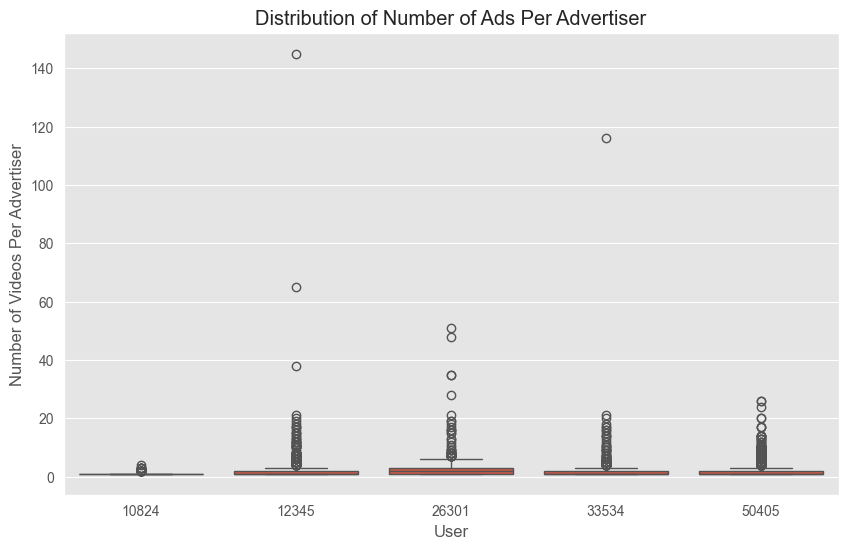

In [1002]:
# Plot the distribution of number of ads from an advertiser
advertiser_value_counts = all_ads.groupby('code')['author_username'].value_counts().reset_index()
sns.set_style("whitegrid")
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
sns.boxplot(data=advertiser_value_counts, x='code',y='count')
plt.title('Distribution of Number of Ads Per Advertiser')
plt.xlabel('User')
plt.ylabel('Number of Videos Per Advertiser')

In [1013]:
# Look specifically at advertiser accounts containing "Amazon"
advertiser_value_counts[advertiser_value_counts['author_username'].str.contains('Amazon')]

,code,author_username,count
396,12345,Amazon Shopping,2
484,12345,AmazonFreevee,1
875,26301,Amazon,48
876,26301,Amazon Shopping,35
884,26301,Amazon Home,16
1408,33534,Amazon Shopping,116
1409,33534,Amazon Home,21
1434,33534,Amazon Prime,7
1448,33534,Amazon,5
2111,50405,Amazon Home,9


In [1050]:
# Looking at the top advertisers for each user
avc10824 = advertiser_value_counts[advertiser_value_counts['code']=='10824'].sort_values('count',ascending=False)
avc12345 = advertiser_value_counts[advertiser_value_counts['code']=='12345'].sort_values('count',ascending=False)
avc26301 = advertiser_value_counts[advertiser_value_counts['code']=='26301'].sort_values('count',ascending=False)
avc33534 = advertiser_value_counts[advertiser_value_counts['code']=='33534'].sort_values('count',ascending=False)
avc50405 = advertiser_value_counts[advertiser_value_counts['code']=='50405'].sort_values('count',ascending=False)

avcDfs = [avc10824,avc12345,avc26301,avc33534,avc50405]

In [1138]:
def plot_top_n_avertiser_frequency(n,code,df):
    # Add column with shortened advertiser name
    df2 = df.copy()
#     df2['shortened_author'] = df2['author_username'].apply(lambda x: x.split()[0])
    df2['shortened_author'] = df2['author_username'].apply(lambda x:x[:15])
   
    # Plot the frequency of the top n advertisers
    plt.style.use('ggplot')
    plt.figure(figsize=(5,2))
#     sns.barplot(data=df[:n],x='author_username', y='count')
    sns.barplot(data=df2[:n],x='shortened_author',y='count')
    plt.title(f'Ad Counts from Top {n} Advertisers for User {code}')
    plt.xlabel('Advertiser Account')
    plt.ylabel('Number of Ads')
    plt.xticks(rotation=45)
    plt.show()

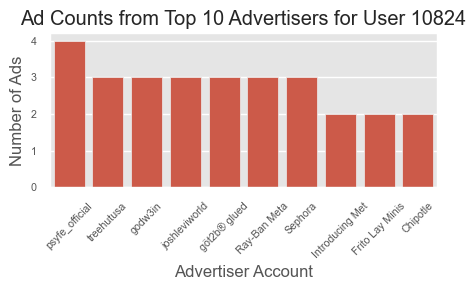

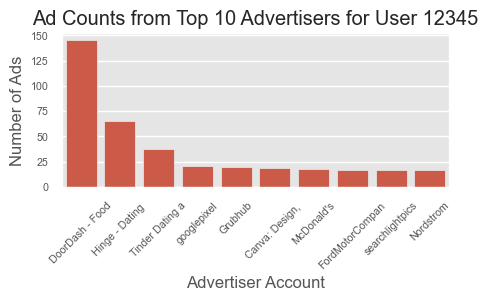

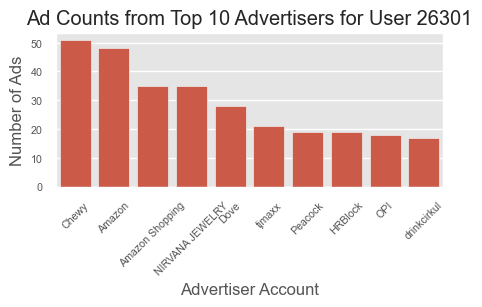

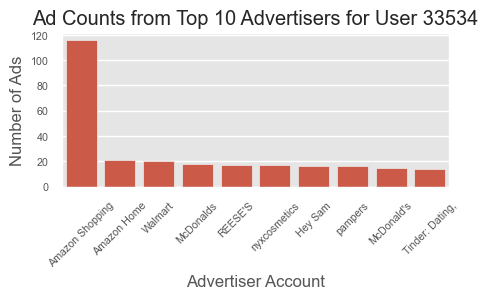

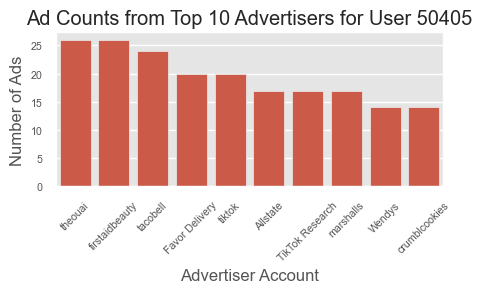

In [1139]:
for code, avcdf in zip(codes, avcDfs):
    plot_top_n_avertiser_frequency(10,code,avcdf)

In [994]:
# Look at how many advertisers appear once vs more than once
def get_count_category(count):
    if count == 1:
        return "1 Ad"
    else: return ">1 Ad"
advertiser_value_counts2 = advertiser_value_counts.copy()
advertiser_value_counts2['Count Category'] = advertiser_value_counts2['count'].apply(get_count_category)

# See the number of advertisers with only 1 ad vs >1 ad
advertiser_value_counts2.groupby('code')['Count Category'].value_counts()

code   Count Category
10824  1 Ad               201
       >1 Ad               38
12345  1 Ad               394
       >1 Ad              241
26301  >1 Ad              269
       1 Ad               265
33534  1 Ad               396
       >1 Ad              271
50405  1 Ad              1076
       >1 Ad              635
Name: count, dtype: int64

### Examine Overlap in Advertisers Between Users
Do the same advertisers show up for many of our users?  
What does this tell us about advertisement personalization?

In [1110]:
# Look at overlap in the advertisers for each user
advertiser_overlap = advertiser_value_counts['author_username'].value_counts().reset_index()
advertiser_overlap.columns = ['Advertiser','Number of Users']
advertiser_overlap.head(10)

,Advertiser,Number of Users
0,Sephora,5
1,NewEnglandHondaDealers,5
2,REESE'S,5
3,Target,5
4,Wingstop,5
5,discoverofficial,5
6,KIT KAT ®️,5
7,CapitalOne,5
8,Chewy,5
9,nespresso,5


In [1106]:
# Count the number of overlapping 
advertiser_overlap.groupby('Number of Users').count()

,Advertiser
Number of Users,
1,2261
2,382
3,148
4,58
5,17


### Unique Ad Videos by Advertiser

In [329]:
# Find the counts of each unique video id (each unique advertisement video)
ads_by_advertiser = all_ads.groupby(['author_username','video_id']).size().reset_index()
ads_by_advertiser.columns = ['author_username','video_id','count']
ads_by_advertiser[ads_by_advertiser['count']>10]
ads_by_advertiser.sort_values(by='count',ascending=False)

,author_username,video_id,count
143,Amazon Shopping,7267607669609860354,56
130,Amazon Home,7304053237747813634,43
555,DoorDash - Food Delivery,7293621011013061890,39
558,DoorDash - Food Delivery,7293621012162252033,34
147,Amazon Shopping,7306312509118500097,30
...,...,...,...
5585,wixstudio,7333618556732509448,1
5586,wizz_app,7322780204584226080,1
5571,whowhatwear,7327245868027940098,1
5572,willowboutique____,7267557230226984235,1


In [330]:
# Find the number of unique videos posted per advertiser
unique_ads_by_advertiser = ads_by_advertiser['author_username'].value_counts()
unique_ads_by_advertiser.head()

author_username
TikTok Research        29
primevideo             28
Maybelline New York    25
Target                 24
MONOPOLY GO!           23
Name: count, dtype: int64

/Users/edithpo/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


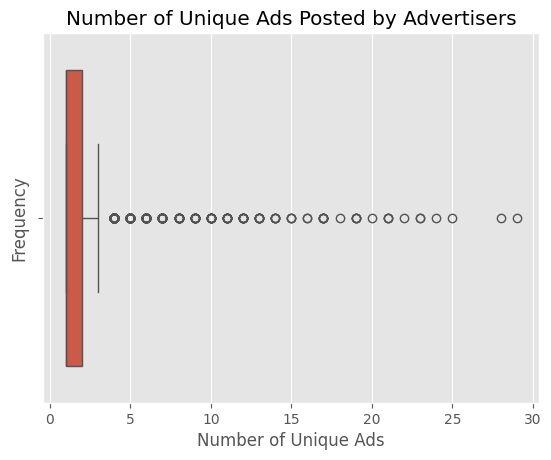

In [331]:
# Visualize the number of unique ad videos posted per advertiser

# Dataframe of counts of unique videos posted per advertiser
unique_ads_by_advertiser = ads_by_advertiser['author_username'].value_counts().reset_index()

# Plot distribution of number of unique ads by advertiser
plt.style.use('ggplot')
sns.boxplot(data=unique_ads_by_advertiser,x='count')
plt.xlabel('Number of Unique Ads')
plt.ylabel('Frequency')
plt.title('Number of Unique Ads Posted by Advertisers')
plt.show()


/var/folders/yl/zl57ck115t9_8v83kxw1gtc40000gn/T/ipykernel_35989/3718691586.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_unique_ads_advertisers['short_author'] = short_author


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'TikTok Research'),
  Text(1, 0, 'primevideo'),
  Text(2, 0, 'Maybelline New York'),
  Text(3, 0, 'Target'),
  Text(4, 0, 'MONOPOLY GO!'),
  Text(5, 0, 'Chewy'),
  Text(6, 0, 'CapitalOne'),
  Text(7, 0, 'Peacock'),
  Text(8, 0, 'marshalls'),
  Text(9, 0, "REESE'S"),
  Text(10, 0, 'Starbucks'),
  Text(11, 0, 'Walmart'),
  Text(12, 0, 'sephora'),
  Text(13, 0, 'nyxcosmetics'),
  Text(14, 0, 'tjmaxx'),
  Text(15, 0, 'Allstate'),
  Text(16, 0, 'DisneyPlus'),
  Text(17, 0, 'Panera Bread'),
  Text(18, 0, 'Wingstop'),
  Text(19, 0, 'Hinge - Dating & Rel'),
  Text(20, 0, 'firstaidbeauty'),
  Text(21, 0, 'Subway®'),
  Text(22, 0, 'Dove'),
  Text(23, 0, "McDonald's"),
  Text(24, 0, 'aerie')])

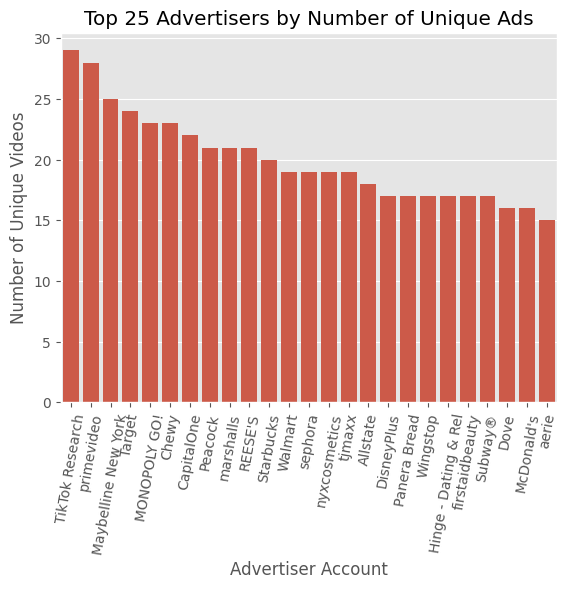

In [344]:
# Advertisers who post many unique ads (produce the )
top_unique_ads_advertisers = unique_ads_by_advertiser.iloc[:25]

# Get shortened x-ticks
short_author = top_unique_ads_advertisers['author_username'].apply(lambda x: x[:20])
top_unique_ads_advertisers['short_author'] = short_author

# Plot the Advertisers who post the highest number of unique videos
sns.barplot(data=top_unique_ads_advertisers,x='short_author',y='count')
plt.xlabel('Advertiser Account')
plt.ylabel('Number of Unique Videos')
plt.title('Top 25 Advertisers by Number of Unique Ads')
plt.xticks(rotation=80)

## Case Study

In [367]:
all_ads['code'].value_counts()

code
50405    3547
12345    1775
26301    1607
33534    1583
10824     285
Name: count, dtype: int64

In [394]:
# Look at all advertisers
# for advertiser in all_dfs['author_username'].unique(): print(advertiser)

In [769]:
# For each user, count the number of ads they received from each advertiser
brand_counts_by_user = all_ads.groupby('code')['author_username'].value_counts().sort_values(ascending=False).reset_index()
brand_counts_by_user.iloc[:20]

,code,author_username,count
0,12345,DoorDash - Food Delivery,145
1,33534,Amazon Shopping,116
2,12345,Hinge - Dating & Relationships,65
3,26301,Chewy,51
4,26301,Amazon,48
5,12345,Tinder Dating app. Meet People,38
6,26301,NIRVANA JEWELRY,35
7,26301,Amazon Shopping,35
8,26301,Dove,28
9,50405,firstaidbeauty,26


In [776]:
# See which brands appear across multiple users
num_users_per_advertiser = brand_counts_by_user['author_username'].value_counts().reset_index()
num_users_per_advertiser.head(20)

,author_username,count
0,Olay,5
1,Chewy,5
2,nespresso,5
3,OREO Cookie,5
4,CapitalOne,5
5,KIT KAT ®️,5
6,discoverofficial,5
7,Wingstop,5
8,NewEnglandHondaDealers,5
9,international_delight,5


In [767]:
# Count the number of ads from each advertiser without grouping by user
brand_counts = all_ads['author_username'].value_counts().sort_values(ascending=False).reset_index()
brand_counts.columns = ['Advertiser', 'Count']
brand_counts.iloc[:10]

,Advertiser,Count
0,Amazon Shopping,162
1,DoorDash - Food Delivery,146
2,Chewy,74
3,Hinge - Dating & Relationships,65
4,Amazon,56
5,tacobell,56
6,marshalls,49
7,tjmaxx,48
8,Dove,48
9,Citizens,47


### Looking at 1 Valentine's-Day-Related Advertiser: "Hinge - Dating & Relationships"

In [611]:
# Get all advertisements from Hinge
hinge = all_dfs[all_dfs['author_username'] == 'Hinge - Dating & Relationships']
hinge['Date'] = hinge['Date'].dt.date
print(hinge.shape)
hinge.head(2)

(65, 25)


/var/folders/yl/zl57ck115t9_8v83kxw1gtc40000gn/T/ipykernel_35989/3266220436.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hinge['Date'] = hinge['Date'].dt.date


,Date,Link,video_id,video_timestamp,video_duration,video_locationcreated,suggested_words,video_diggcount,video_sharecount,video_commentcount,...,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified,Year,Month,code
185,2024-03-05,https://www.tiktokv.com/share/video/7335585750...,7335585750244723970,2024-02-14T17:19:16,60.0,FAKE-AD,"Fall In Love, Fall In Love By A Boogie, In Love",1417.0,6.0,9.0,...,Hinge - Dating & Relationships,NaN,NaN,NaN,NaN,NaN,False,2024,3,12345
186,2024-03-01,https://www.tiktokv.com/share/video/7335585750...,7335585750244723970,2024-02-14T17:19:16,60.0,FAKE-AD,"Fall In Love, Fall In Love By A Boogie, In Love",1417.0,6.0,9.0,...,Hinge - Dating & Relationships,NaN,NaN,NaN,NaN,NaN,False,2024,3,12345


In [612]:
# Check how many users got ads from Hinge
len(hinge['code'].unique())

1

In [613]:
# See the number of unique advertisements posted by Hinge
print("Number of unique ads by Hinge:",len(hinge['video_id'].unique()))

Number of unique ads by Hinge: 17


In [614]:
# Number of times different ads from Hinge appear
hinge['video_id'].value_counts()

video_id
7323344420152052993    14
7323344420705766658    12
7328494396243053825     8
7328494400865111297     7
7330439956667600129     5
7323344418466024705     4
7338600190506749186     3
7335585750244723970     2
7338600197171203330     2
7338600661233175809     1
7338600992297979137     1
7333290693961518337     1
7338599887472233729     1
7330439953249357057     1
7335583254239530241     1
7330439957292535042     1
7258042789273931010     1
Name: count, dtype: int64

In [548]:
# Get number of videos per Date
# hinge_counts = hinge['Date'].value_counts()
# hinge_counts

# type(hinge_counts)
# type(hinge_counts.index)
# type(hinge_counts.values)

# Convert to a Dataframe with 'Date' as the index
# hinge_df = pd.DataFrame(hinge_counts)
# print(hinge_df.shape)
# hinge_df

In [615]:
# # Convert 'Date' timestamp from YYYY-MM-DD hh:mm:ss to only YYYY-MM-DD
# hinge2 = hinge[['Date','Link','video_id','author_username']]
# # hinge2['Date'] = hinge['Date'].dt.strftime('%Y-%m-%d') # Get only the YYYY-MM-DD as str
# # hinge2['Date'] = pd.to_datetime(hinge2['Date']) # Convert back to datetime
# hinge2['Date'] = hinge2['Date'].dt.date
# hinge2

In [783]:
# hinge_counts = hinge2['Date'].value_counts().reset_index()

hinge_counts = hinge['Date'].value_counts().reset_index()
print(hinge_counts.shape)
hinge_counts.head()

(38, 2)


,Date,count
0,2024-02-24,6
1,2024-02-22,4
2,2024-01-22,3
3,2024-02-28,3
4,2024-02-15,3


In [617]:
hinge_counts2 = hinge_counts.set_index('Date',inplace=False).sort_index()
print(hinge_counts2.shape)
hinge_counts2.head()

(38, 1)


,count
Date,
2024-01-14,1
2024-01-15,1
2024-01-17,1
2024-01-18,2
2024-01-19,1


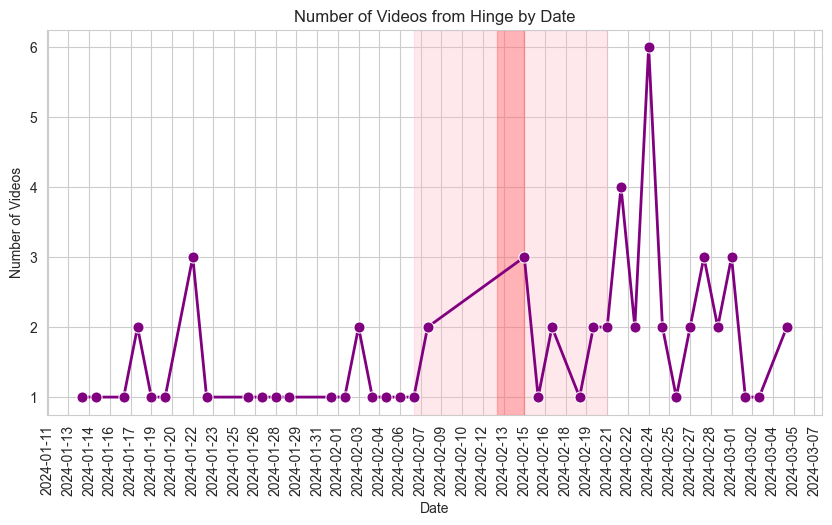

In [811]:
# Create a line graph
plt.figure(figsize=(10, 5))
plt.style.use('default')
sns.set_style("whitegrid")
sns.lineplot(data=hinge_counts2, x='Date',y='count',marker='o',linewidth=2, markersize=8,color="purple")
plt.xlabel('Date')
plt.ylabel('Number of Videos')
plt.title('Number of Videos from Hinge by Date')
plt.xticks(rotation=90)
# Highlight Valentine's Day
plt.axvspan('2024-02-13', '2024-02-15', color='red', alpha=0.3)
plt.axvspan('2024-02-07', '2024-02-21', color='lightpink', alpha=0.3)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(hinge_counts2.index.unique())))
plt.show()

In [606]:
def filter_by_date_range(df, date_col, start_date, end_date):
    mask = (df[date_col] >= pd.Timestamp(start_date)) & (df[date_col] < pd.Timestamp(end_date))
    return df.loc[mask]

In [626]:
hinge_user = hinge['code'].to_list()[0]

# Get a df of only this user to see whether this spike may be related to increase in user activity
hu_activity = all_dfs[all_dfs['code']==hinge_user]
hu_activity_jan_mar = filter_by_date_range(hu_activity, 'Date','2024-01-14','2024-03-14')
hu_activity_jan_mar['Date'] = hu_activity_jan_mar['Date'].dt.date
hu_activity_jan_mar.head(3)

/var/folders/yl/zl57ck115t9_8v83kxw1gtc40000gn/T/ipykernel_35989/1646137243.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hu_activity_jan_mar['Date'] = hu_activity_jan_mar['Date'].dt.date


,Date,Link,video_id,video_timestamp,video_duration,video_locationcreated,suggested_words,video_diggcount,video_sharecount,video_commentcount,...,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified,Year,Month,code
0,2024-02-26,https://www.tiktokv.com/share/video/7331569476...,7331569476502064414,2024-02-03T21:34:29,7.0,US,"Hamsters, Cute Hamster, Hamsters Of TikTok, Ha...",70000.0,727.0,148.0,...,Ky,NaN,NaN,NaN,NaN,NaN,False,2024,2,12345
1,2024-02-26,https://www.tiktokv.com/share/video/7334088719...,7334088719881882913,2024-02-10T16:30:26,46.0,IE,NaN,8978.0,144.0,74.0,...,ItsAlwaysFunnyInPhilidelphia,NaN,NaN,NaN,NaN,NaN,False,2024,2,12345
2,2024-02-26,https://www.tiktokv.com/share/video/7317823927...,7317823927156329771,2023-12-28T20:34:44,5.0,US,"baddieshub, baddiehub noemy, noemy baddieshub ...",753300.0,3817.0,3701.0,...,Noemy,NaN,NaN,NaN,NaN,NaN,False,2024,2,12345


In [633]:
activity_counts = hu_activity_jan_mar['Date'].value_counts().reset_index() # turn into df
activity_counts = activity_counts.set_index('Date').sort_index() # set index to date, sort by date
activity_counts.head()

,count
Date,
2024-01-14,227
2024-01-15,165
2024-01-16,131
2024-01-17,125
2024-01-18,329


In [637]:
activity_counts

,count
Date,
2024-01-14,227
2024-01-15,165
2024-01-16,131
2024-01-17,125
2024-01-18,329
2024-01-19,231
2024-01-20,192
2024-01-21,134
2024-01-22,75


In [635]:
activity_counts.shape

(54, 1)

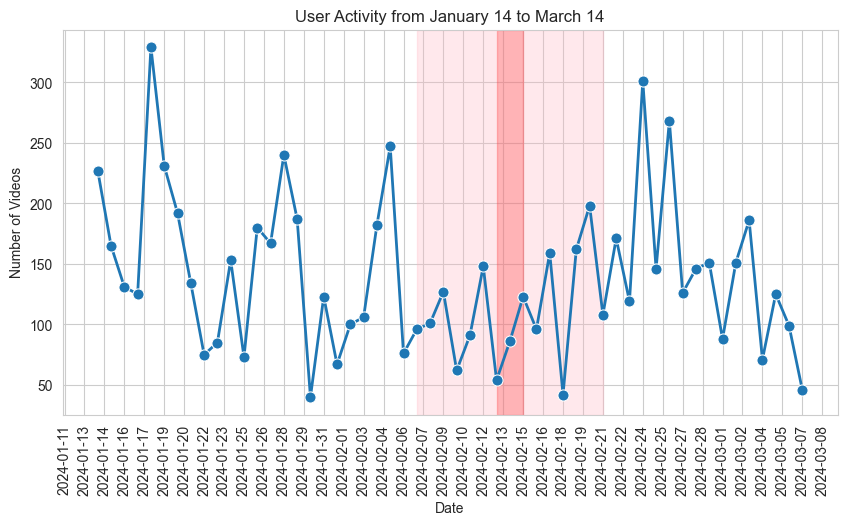

In [810]:
# Graph user with hinge advertisements activity the month before and after Valentine's day
plt.figure(figsize=(10, 5))
plt.style.use('default')
sns.set_style("whitegrid")
sns.lineplot(data=activity_counts, x=activity_counts.index,y='count',
             marker='o',linewidth=2, markersize=8)
plt.xlabel('Date')
plt.ylabel('Number of Videos')
plt.title('User Activity from January 14 to March 14')
plt.xticks(rotation=90)
# Highlight Valentine's Day
plt.axvspan('2024-02-13', '2024-02-15', color='red', alpha=0.3)
plt.axvspan('2024-02-07', '2024-02-21', color='lightpink', alpha=0.3)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(activity_counts.index.unique())))
plt.show()

In [779]:
hinge_counts.head(3)

,Date,count
0,2024-02-24,6
1,2024-02-22,4
2,2024-01-22,3


In [778]:
activity_counts.head(3)

,count
Date,
2024-01-14,227
2024-01-15,165
2024-01-16,131


In [821]:
# hinge_counts2['just_hinge'] = True
# activity_counts['just_hinge'] = False

# combo_counts = pd.concat([hinge_counts2,activity_counts])
# combo_counts = combo_counts.sort_index()

# combo_counts.head(3)

hinge_counts2['Video Type'] = 'Hinge Ad'
activity_counts['Video Type'] = 'All Videos'
combo_counts = pd.concat([hinge_counts2,activity_counts])
combo_counts = combo_counts.sort_index()
combo_counts.head(3)

,count,just_hinge,Video Type
Date,,,
2024-01-14,1,True,Hinge Ad
2024-01-14,227,False,All Videos
2024-01-15,1,True,Hinge Ad


/Users/edithpo/miniconda3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/edithpo/miniconda3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


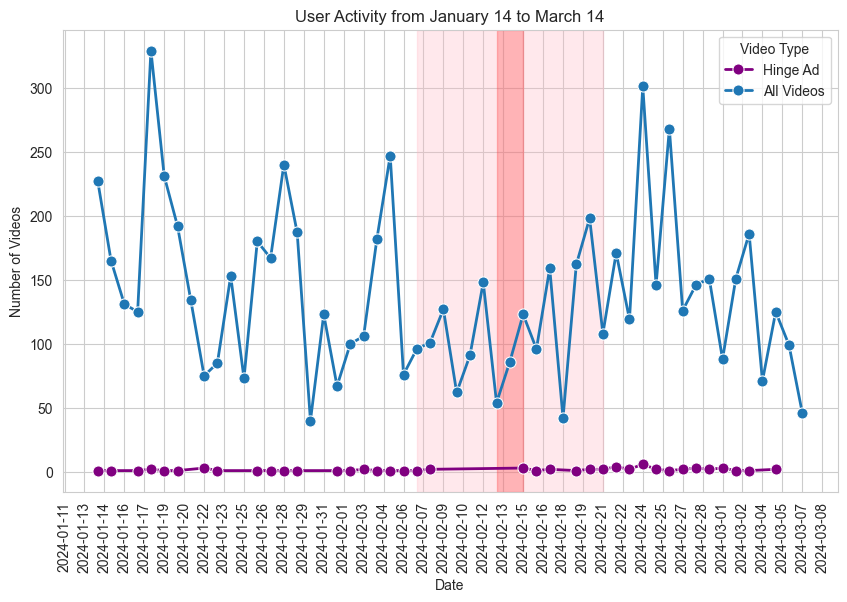

In [824]:
# Graph both user activity and hinge specific activity
plt.figure(figsize=(10, 6))
plt.style.use('default')
sns.set_style("whitegrid")
palette = sns.color_palette(['purple','tab:blue'])
sns.lineplot(data=combo_counts, x=combo_counts.index,y='count',marker='o',linewidth=2, markersize=8,
            hue='Video Type', palette=palette)
plt.xlabel('Date')
plt.ylabel('Number of Videos')
plt.title('User Activity from January 14 to March 14')
plt.xticks(rotation=90)
# Highlight Valentine's Day
plt.axvspan('2024-02-13', '2024-02-15', color='red', alpha=0.3)
plt.axvspan('2024-02-07', '2024-02-21', color='lightpink', alpha=0.3)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(activity_counts.index.unique())))
plt.show()

## Calculate on Average the Number of Words per Ad

In [794]:
all_ads.columns

Index(['Date', 'Link', 'video_id', 'video_timestamp', 'video_duration',
       'video_locationcreated', 'suggested_words', 'video_diggcount',
       'video_sharecount', 'video_commentcount', 'video_playcount',
       'video_description', 'video_is_ad', 'video_stickers', 'author_username',
       'author_name', 'author_followercount', 'author_followingcount',
       'author_heartcount', 'author_videocount', 'author_diggcount',
       'author_verified', 'Year', 'Month', 'code'],
      dtype='object')

In [855]:
ad_text = all_ads[['video_description','suggested_words']]

# Convert text columns to string type
ad_text['video_description'] = ad_text['video_description'].astype(str)
ad_text['suggested_words'] = ad_text['suggested_words'].astype(str)

# Check the character lengths of descriptions and suggested words
ad_text['desc_len'] = ad_text['video_description'].apply(len)
ad_text['sw_len'] = ad_text['suggested_words'].apply(lambda x: 0 if x=='nan' else len(x))
ad_text['total_len'] = ad_text['desc_len'] + ad_text['sw_len']

# Check the word counts of descriptions and suggested words
ad_text['num_desc_words'] = ad_text['video_description'].apply(lambda x: len(x.split()))
ad_text['num_sug_words'] = ad_text['suggested_words'].apply(lambda x: 0 if x=='nan' else len(x.split()))
ad_text['num_words'] = ad_text['num_desc_words'] + ad_text['num_sug_words']

ad_text.head()

/var/folders/yl/zl57ck115t9_8v83kxw1gtc40000gn/T/ipykernel_35989/869342988.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_text['video_description'] = ad_text['video_description'].astype(str)
/var/folders/yl/zl57ck115t9_8v83kxw1gtc40000gn/T/ipykernel_35989/869342988.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_text['suggested_words'] = ad_text['suggested_words'].astype(str)
/var/folders/yl/zl57ck115t9_8v83kxw1gtc40000gn/T/ipykernel_35989/869342988.py:8: SettingWithCopyWarning: 
A value is t

,video_description,suggested_words,desc_len,sw_len,total_len,num_desc_words,num_sug_words,num_words
657,Prioritising healthy hair all year long with t...,nan,228,0,228,30,0,30
1544,Bro just buy it tbh. I skipped so many ads and...,"Shadow Work Journal, the shadow work journal, ...",158,198,356,24,30,54
1842,the birthday dance agenda continues #howarduni...,"birthday dance josh levi, howard university, H...",60,213,273,7,27,34
2415,When should we drop these? 👀🤍 The ‘Bamba Set’ ...,nan,141,0,141,17,0,17
2419,Must-have brands @ ASOS,"asos, Must Haves, ASOS Clothes, brands, Clothe...",23,131,154,4,21,25


In [856]:
ad_text['num_words'].describe()

count    8797.000000
mean       27.783108
std        26.527162
min         0.000000
25%        12.000000
50%        20.000000
75%        38.000000
max       430.000000
Name: num_words, dtype: float64

Text(0, 0.5, 'Frequency')

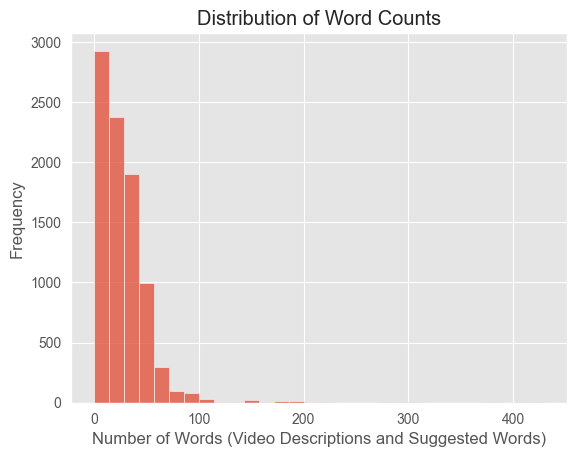

In [864]:
# See the distribution of number of words
sns.histplot(data=ad_text,x='num_words',bins=30)
plt.style.use('ggplot')
plt.title('Distribution of Word Counts')
plt.xlabel('Number of Words (Video Descriptions and Suggested Words)')
plt.ylabel('Frequency')

Try to do topic modeling on ALL the ads, independent of the user.
Sometimes people don't remove duplicates, since this would indicate that some things are more frequent than other.

We can transform the user's data based on the topics (?)
Compare which topic are more prevalent for each user.
Calculate percentages of which topics showed up the most for each user.


PyLDAvis, based on an R tool that lets you visualize topics.
Stopped working with sklearn.

Could calculate the probability that a word is related to a topic.


Difficult to interpret the label of each topic since a lot of the words are related to big companies that do a lot.

Try to go back from these topics to the documents.
At the end of the tutorial, there's a matrix/table that shows the topic and the documents.

Instead of just having the dominant topic, also add a column with the text of the ad. Show all docs where topic # is dominant.

Read a couple of documents per topic to interpret the topic labels.

Even if we are not able to come up with meaningful labels, still try to see what topics are different across users and when those topics change.

Even if we don't give a name to a topic, we can still see differences among the users.

Is it personalizing by users or is it just using the time of year??


In terms of looking at individual time periods...
If we do the topics without a time component, they get mixed up.
We want to see which topics are the most dominant in different periods of time.
How to deal with this - hoping that the topics were picked up, show the document at a time, is the holiday the dominant topic?